In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from matplotlib import pylab
import nltk
from nltk import FreqDist


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("/Users/apple/Downloads/A_R copy - Sheet1.csv")
df

,Title,Ratings,Comments,Date,month
0,Supper,5,Nice,1-Feb-20,February
1,Good product,5,Nice,2-Feb-20,February
2,Good,4,Good,3-Feb-20,February
3,Value for money,5,Nice,4-Feb-20,February
4,Good,5,Good,4-Feb-20,February
...,...,...,...,...,...
179,Good product.,5,"Good product, nice design and fairly priced.",25-Jul-20,July
180,Good quality product,5,Amazing product,26-Jul-20,July
181,good to,4,"Original product,good to buy",27-Jul-20,July
182,Cheating in selling,1,Used product you can see water in machine ca...,27-Jul-20,July


#removing newlines charater from dataframe cells 
df = df.replace('\n','', regex=True)
df

In [3]:
df.shape

(184, 5)

In [4]:

df.describe()

,Ratings
count,184.000000
mean,4.445652
std,0.950860
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
df.dtypes

Title       object
Ratings      int64
Comments    object
Date        object
month       object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     183 non-null    object
 1   Ratings   184 non-null    int64 
 2   Comments  184 non-null    object
 3   Date      184 non-null    object
 4   month     184 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.3+ KB


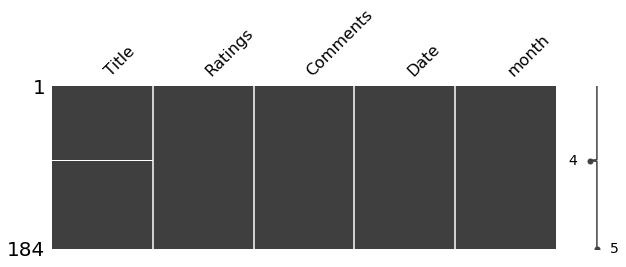

In [7]:
# Finding number of null values by Plot
import missingno
missingno.matrix(df, figsize = (10,3))

In [8]:
# Finding number of null values
df.isnull().sum()

Title       1
Ratings     0
Comments    0
Date        0
month       0
dtype: int64

In [9]:
#Total numnber of unique reviews
df.nunique()

Title       105
Ratings       5
Comments    122
Date         92
month         6
dtype: int64

In [10]:
#Drop duplicate rows in Pandas based on column
df1=df.drop_duplicates(subset='Comments', keep="first")
df1.shape

(122, 5)

In [11]:
df2=df1.drop(["Title"],axis=1)



In [12]:
df2.shape

(122, 4)

In [13]:
df2['Date'] = pd.to_datetime(df2.Date) 
df2.head()

,Ratings,Comments,Date,month
0,5,Nice,2020-02-01,February
2,4,Good,2020-02-03,February
5,4,Good product,2020-02-05,February
6,5,Delivery is very good..nice product...,2020-02-06,February
7,4,Easy to use,2020-02-06,February


In [14]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize


In [15]:
#df1['review'].astype(str)

sentence=[]
#Tokenize the text by sentence

def sentence_token(data,range=(len(df1['review']))):
    sent = [sent_tokenize(word) for word in data]
    sentence.append(sent)

sentence_token(df1['review'])

sentence

# Pre-processing

In [16]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
wnl = WordNetLemmatizer()
from textblob import TextBlob
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
corpus = []
def data_clean(data):
    wnl = nltk.WordNetLemmatizer()
    for i in data:
        review = re.sub('[^a-zA-Z]',' ',str(i))#remove all except a-z A-Z text
        review = review.lower()#to lowercase
        review = review.split()#split the text
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = [wnl.lemmatize(word) for word in review]
        review = ' '.join(review)
        corpus.append(review)

In [18]:
data_clean(df2['Comments'])

In [19]:
corpus

['nice',
 'good',
 'good product',
 'deliveri good nice product',
 'easi use',
 'good work',
 'work properli',
 'happi',
 'excel product',
 'hi',
 'item good deliveri late',
 'valu money',
 'easi use look nice',
 'nice product',
 'excel',
 'good',
 'warranti card come',
 'recommend',
 'superb product',
 'good product',
 'valu money',
 'good one',
 'mast hai',
 'look good easi use',
 'easi use good product',
 'best low price segment',
 'damag product',
 'perfectismo',
 'product good',
 'good thx',
 'awesom product',
 'super',
 'plea replac product immigatali',
 'worth',
 'use',
 'nice product',
 'good machin',
 'good qualiti',
 'like',
 'ghjj',
 'wash',
 'perfect',
 'receiv hard copi bill',
 'like item',
 'niceeee',
 'v good',
 'easi use',
 'eari use',
 'ok',
 'wow',
 'easi use',
 '',
 'product nice',
 'disgust',
 'great product',
 'good product rang',
 'na',
 'vallu money',
 'super',
 'world class',
 'easi use',
 '',
 'expect',
 'best product',
 'nice product work superbl',
 'good',
 '

# Finding the most Frequent words

In [20]:
# Joinining all the reviews into single paragraph 
corpus_string = " ".join(corpus)
#all word tokens
words_tokens= word_tokenize(corpus_string)


In [21]:
words_tokens

['nice',
 'good',
 'good',
 'product',
 'deliveri',
 'good',
 'nice',
 'product',
 'easi',
 'use',
 'good',
 'work',
 'work',
 'properli',
 'happi',
 'excel',
 'product',
 'hi',
 'item',
 'good',
 'deliveri',
 'late',
 'valu',
 'money',
 'easi',
 'use',
 'look',
 'nice',
 'nice',
 'product',
 'excel',
 'good',
 'warranti',
 'card',
 'come',
 'recommend',
 'superb',
 'product',
 'good',
 'product',
 'valu',
 'money',
 'good',
 'one',
 'mast',
 'hai',
 'look',
 'good',
 'easi',
 'use',
 'easi',
 'use',
 'good',
 'product',
 'best',
 'low',
 'price',
 'segment',
 'damag',
 'product',
 'perfectismo',
 'product',
 'good',
 'good',
 'thx',
 'awesom',
 'product',
 'super',
 'plea',
 'replac',
 'product',
 'immigatali',
 'worth',
 'use',
 'nice',
 'product',
 'good',
 'machin',
 'good',
 'qualiti',
 'like',
 'ghjj',
 'wash',
 'perfect',
 'receiv',
 'hard',
 'copi',
 'bill',
 'like',
 'item',
 'niceeee',
 'v',
 'good',
 'easi',
 'use',
 'eari',
 'use',
 'ok',
 'wow',
 'easi',
 'use',
 'product'

In [22]:
fdist_words = FreqDist(words_tokens)
fdist_words

FreqDist({'product': 44, 'good': 37, 'use': 14, 'nice': 13, 'easi': 9, 'machin': 9, 'deliveri': 7, 'work': 7, 'money': 7, 'wash': 6, ...})

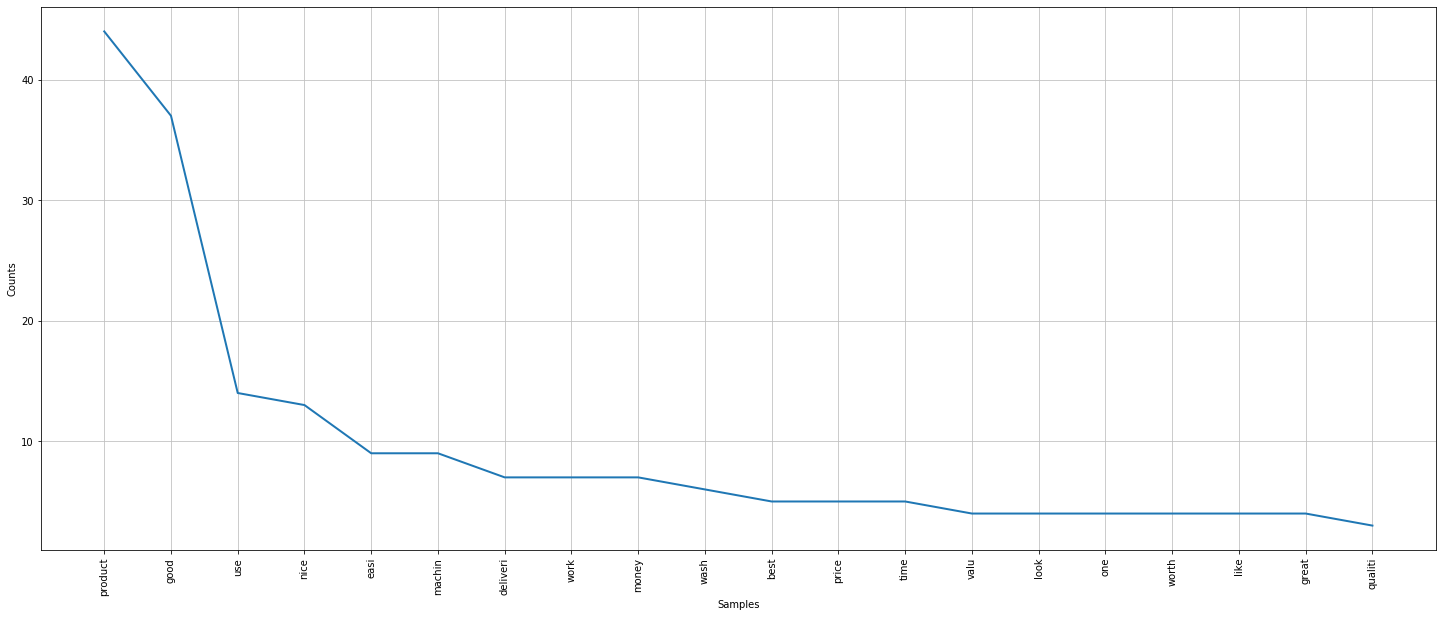

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
fdist_words.plot(20)


In [24]:
fdist_words_df=fdist_words.most_common(30)
fdist_words_df

[('product', 44),
 ('good', 37),
 ('use', 14),
 ('nice', 13),
 ('easi', 9),
 ('machin', 9),
 ('deliveri', 7),
 ('work', 7),
 ('money', 7),
 ('wash', 6),
 ('best', 5),
 ('price', 5),
 ('time', 5),
 ('valu', 4),
 ('look', 4),
 ('one', 4),
 ('worth', 4),
 ('like', 4),
 ('great', 4),
 ('qualiti', 3),
 ('light', 3),
 ('weight', 3),
 ('day', 3),
 ('satisfi', 3),
 ('excel', 2),
 ('item', 2),
 ('card', 2),
 ('superb', 2),
 ('damag', 2),
 ('awesom', 2)]

In [25]:
word= pd.DataFrame(list(fdist_words_df), columns = ["Words","Frequency"]) 
word.head()

,Words,Frequency
0,product,44
1,good,37
2,use,14
3,nice,13
4,easi,9


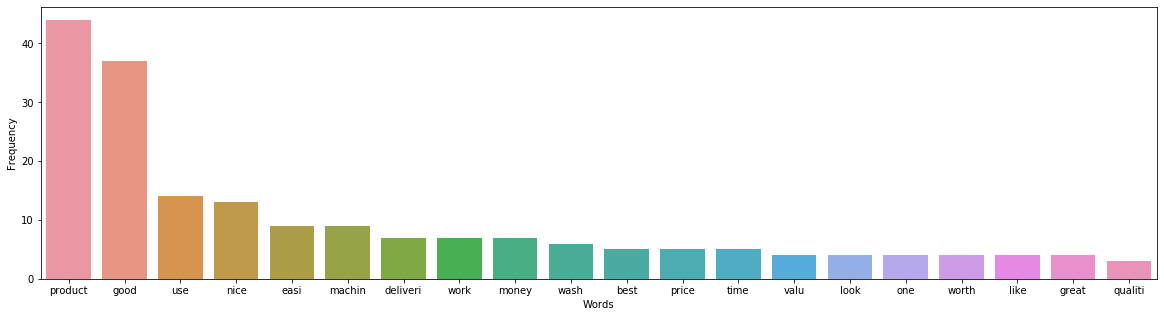

In [26]:
#BarPlot for Frequent word
word_plot= word.nlargest(columns="Frequency", n = 20) 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=word_plot, x= "Words", y = "Frequency")
ax.set(ylabel = 'Frequency')
plt.show()

In [27]:
df2['cleaned_reviews']=corpus

In [28]:
df2.head()

,Ratings,Comments,Date,month,cleaned_reviews
0,5,Nice,2020-02-01,February,nice
2,4,Good,2020-02-03,February,good
5,4,Good product,2020-02-05,February,good product
6,5,Delivery is very good..nice product...,2020-02-06,February,deliveri good nice product
7,4,Easy to use,2020-02-06,February,easi use


TextBlob : TextBlob is a python library tst is build on top of nltk.   
It's easier to use and provide some additional functionality ,such as rule based sentiment scores

Polarity : (-1 to +1)(negative to Positive)  
Subjectivity : (0 to +1)(fact to Opinion)

In [29]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity   
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [30]:
df2['polarity'] = df2['cleaned_reviews'].apply(pol)
df2['subjectivity'] = df2['cleaned_reviews'].apply(sub)
df2.head()

,Ratings,Comments,Date,month,cleaned_reviews,polarity,subjectivity
0,5,Nice,2020-02-01,February,nice,0.60,1.0
2,4,Good,2020-02-03,February,good,0.70,0.6
5,4,Good product,2020-02-05,February,good product,0.70,0.6
6,5,Delivery is very good..nice product...,2020-02-06,February,deliveri good nice product,0.65,0.8
7,4,Easy to use,2020-02-06,February,easi use,0.00,0.0


#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.xlabel('Polarity')
    plt.ylabel('Number of Reviews')
    plt.title('Histogram of Polarity Score')
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

plot_data(df1,'polarity1')

Text(0.5, 1.0, 'Histogram of Polarity Score')

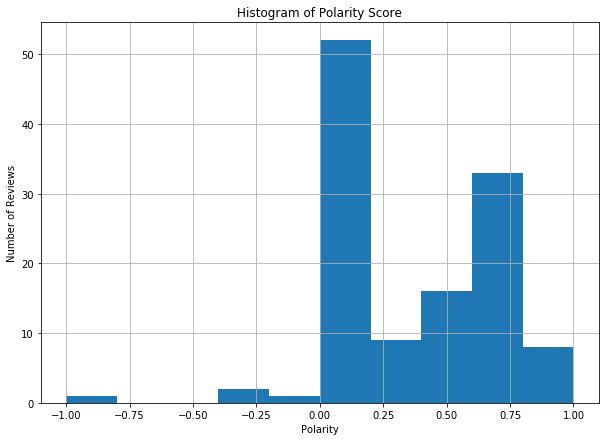

In [31]:
plt.figure(figsize=(10,7))
df2['polarity'].hist()
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df2.polarity1, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

[Text(0, 0.5, 'probability'), Text(0.5, 0, 'polarity')]

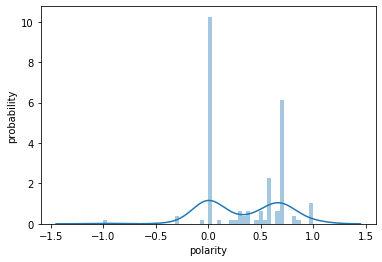

In [32]:
#  Distribution plot of polarity
Polarity=sns.distplot(df2['polarity'],bins=50)
Polarity.set(xlabel="polarity", ylabel = "probability")

In [33]:
# Number of Words
df2['word_count'] = df2['cleaned_reviews'].apply(lambda x: len(str(x).split(" ")))
df2.loc[:,('cleaned_reviews','word_count')].head()

,cleaned_reviews,word_count
0,nice,1
2,good,1
5,good product,2
6,deliveri good nice product,4
7,easi use,2


In [34]:
df2['word_count'].describe()

count    122.00000
mean       3.00000
std        2.98481
min        1.00000
25%        1.00000
50%        2.00000
75%        4.00000
max       18.00000
Name: word_count, dtype: float64

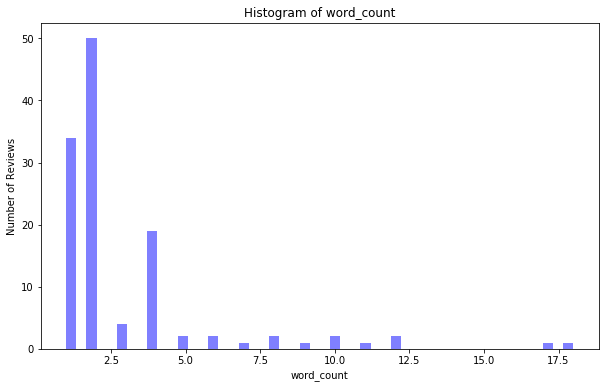

In [35]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df2.word_count, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('word_count')
plt.ylabel('Number of Reviews')
plt.title('Histogram of word_count')
plt.show()

# Classifing cleaned_reviews based on Polarity

In [36]:
df2['label'] = 0
df2.loc[df2['polarity'] > 0.2, 'label'] = 1
df2.loc[df2['polarity'] < -0.2, 'label'] = -1
df2.head()

,Ratings,Comments,Date,month,cleaned_reviews,polarity,subjectivity,word_count,label
0,5,Nice,2020-02-01,February,nice,0.60,1.0,1,1
2,4,Good,2020-02-03,February,good,0.70,0.6,1,1
5,4,Good product,2020-02-05,February,good product,0.70,0.6,2,1
6,5,Delivery is very good..nice product...,2020-02-06,February,deliveri good nice product,0.65,0.8,4,1
7,4,Easy to use,2020-02-06,February,easi use,0.00,0.0,2,0


## Postive Words Frequency

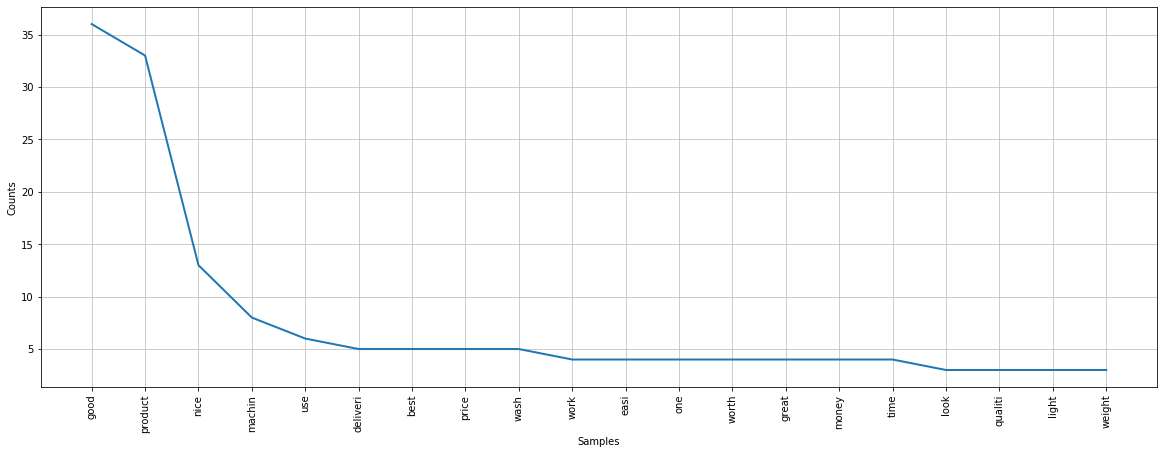

In [37]:
##Postive Words
pos_review = list(df2[df2.label == 1].cleaned_reviews)


# Joinining all the reviews into single paragraph 
pos_string = " ".join(pos_review)
#all word tokens
ps_words_tokens= word_tokenize(pos_string)
#positive fdist_words
pos_fdist_words = FreqDist(ps_words_tokens)
plt.figure(figsize=(20,7))
pos_fdist_words.plot(20)


## Negative word frequency

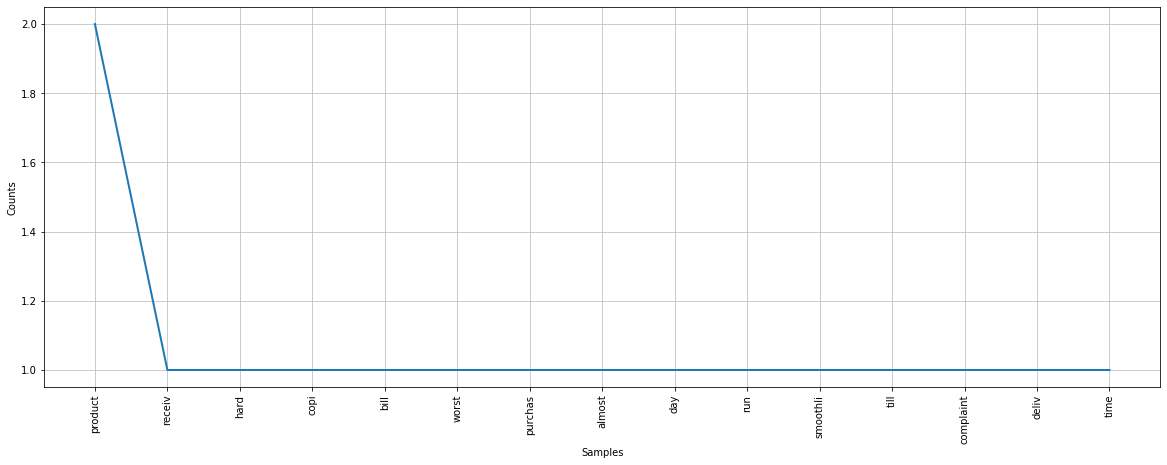

In [38]:
##Negative Words
neg_review = list(df2[df2.label == -1].cleaned_reviews)


# Joinining all the reviews into single paragraph 
neg_string = " ".join(neg_review)
#all word tokens
neg_words_tokens= word_tokenize(neg_string)
#Negative fdist_words
neg_fdist_words = FreqDist(neg_words_tokens)
plt.figure(figsize=(20,7))
neg_fdist_words.plot(20)


# Positive Cloud

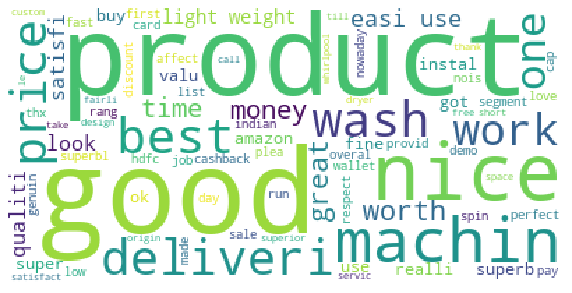

In [39]:
from wordcloud import WordCloud 
pos_cloud = WordCloud(background_color='white').generate(pos_string)
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(pos_cloud)
plt.axis('off')
plt.show()

# Negative Cloud

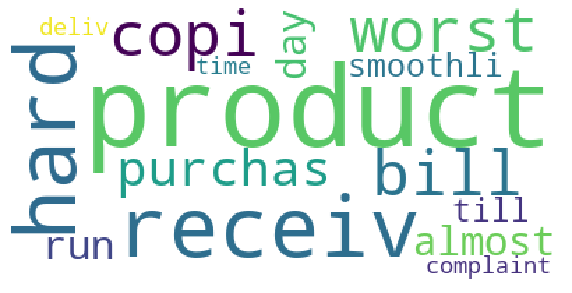

In [40]:
from wordcloud import WordCloud 
neg_cloud = WordCloud(background_color='white').generate(neg_string)
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(neg_cloud)
plt.axis('off')
plt.show()

In [41]:
df4=pd.DataFrame(df2,columns=("Ratings","Date","month","polarity"))
df4.head()

,Ratings,Date,month,polarity
0,5,2020-02-01,February,0.60
2,4,2020-02-03,February,0.70
5,4,2020-02-05,February,0.70
6,5,2020-02-06,February,0.65
7,4,2020-02-06,February,0.00


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Months'),
 Text(0.5, 1.0, 'No.of Reviews in each Month')]

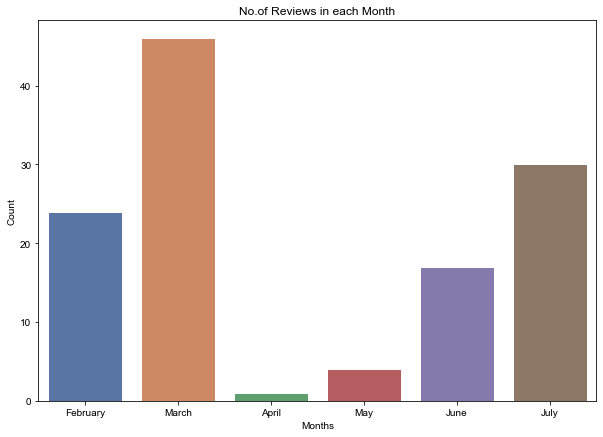

In [42]:
import seaborn as sns
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x="month", data=df4,ax=ax)
ax.set(xlabel="Months", ylabel = "Count",title="No.of Reviews in each Month")

# Monthly Ratings

In [43]:
# Grouping Ratings values based on Month
mon_Ratings = (df4.groupby(df4['month'])['Ratings'].mean()).to_frame().reset_index()
mon_Ratings 

,month,Ratings
0,April,5.000000
1,February,4.541667
2,July,4.133333
3,June,4.470588
4,March,4.217391
5,May,4.750000


In [44]:
#sorting Month Column
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
monthly_rating=Sort_Dataframeby_MonthandNumeric_cols(df = mon_Ratings, monthcolumn='month',numericcolumn='Ratings')
monthly_rating

,month,Ratings
0,February,4.541667
1,March,4.217391
2,April,5.000000
3,May,4.750000
4,June,4.470588
5,July,4.133333


In [45]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
monthly_rating[["Ratings"]] = min_max_scaler.fit_transform(monthly_rating[["Ratings"]])
monthly_rating

,month,Ratings
0,February,0.471154
1,March,0.096990
2,April,1.000000
3,May,0.711538
4,June,0.389140
5,July,0.000000


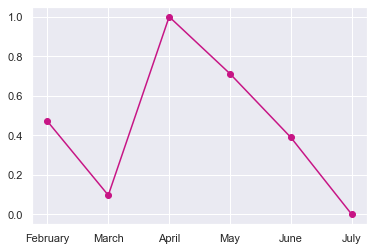

In [46]:
#import seaborn as sns
plt.plot( 'month', 'Ratings', data=monthly_rating, marker='o', color='mediumvioletred')

# Graph of rating Values based on Months

In [47]:
monthly_rating.set_index('month',inplace=True)

# Monthly Polarity

In [48]:
# Grouping Polarity values based on Month
mon_polarity = (df4.groupby(df4['month'])['polarity'].mean()).to_frame().reset_index()
mon_polarity                       

,month,polarity
0,April,0.600000
1,February,0.356250
2,July,0.355185
3,June,0.358824
4,March,0.305978
5,May,0.289583


In [49]:
#sorting Month Column
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
monthly_polarity=Sort_Dataframeby_MonthandNumeric_cols(df = mon_polarity, monthcolumn='month',numericcolumn='polarity')
monthly_polarity

,month,polarity
0,February,0.356250
1,March,0.305978
2,April,0.600000
3,May,0.289583
4,June,0.358824
5,July,0.355185


In [50]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
monthly_polarity[["polarity"]] = min_max_scaler.fit_transform(monthly_polarity[["polarity"]])
monthly_polarity

,month,polarity
0,February,0.214765
1,March,0.052816
2,April,1.000000
3,May,0.000000
4,June,0.223056
5,July,0.211335


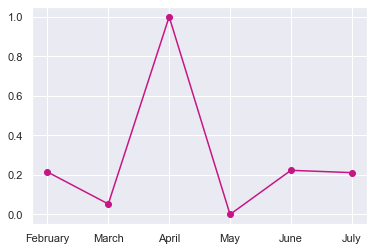

In [51]:
import seaborn as sns
plt.plot( 'month', 'polarity', data=monthly_polarity, marker='o', color='mediumvioletred')
# Graph of Polarity Values based on Months

In [52]:
monthly_polarity.set_index('month',inplace=True)

def fetch_sentiment_using_textblob(text):
    sentiment = []
    for i in text: 
        analysis = TextBlob(i)
        # set sentiment 
        if analysis.sentiment.polarity >= 0:
            sentiment.append('positive')
        else: 
            sentiment.append('negative')
    return sentiment

tweet_list = df1['cleaned_reviews'].tolist()
df1['sentiment']= fetch_sentiment_using_textblob(tweet_list)
df1.head()

plt.figure(figsize=(8,5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df2['label'].value_counts().plot.bar()

from PIL import Image
from wordcloud import STOPWORDS
mask = np.array(Image.open('/Users/apple/Downloads/thumb_up2.png'))
mask

mask = np.array(Image.open('/Users/apple/Downloads/thumb_up2.png'))
wc = WordCloud(stopwords=STOPWORDS, 
               mask=mask, background_color="white",
               max_words=30, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(neg_string)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [53]:
#sentiment_label.to_csv('sentiment_label.csv')

#ft_values = get_transformed(sentiment_label, low_pass_size =5, x_reverse_len =123,padding_factor = 20,scale_vals = F,scale_range = T)

# WHIRLPOOL NSE Data

In [54]:
stock=pd.read_csv("/Users/apple/Downloads/WHIRLPOOL.csv")
stock.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WHIRLPOOL,EQ,01-Feb-2020,2473.25,2488.00,2488.0,2401.45,2433.8,2417.10,2448.50,29762,7.287234e+07,2670,14888,50.02
1,WHIRLPOOL,EQ,03-Feb-2020,2417.10,2390.00,2436.7,2361.80,2410.0,2402.80,2409.86,35169,8.475226e+07,7921,20382,57.95
2,WHIRLPOOL,EQ,04-Feb-2020,2402.80,2435.00,2446.3,2404.65,2416.0,2420.45,2422.94,29210,7.077419e+07,2793,13731,47.01
3,WHIRLPOOL,EQ,05-Feb-2020,2420.45,2439.35,2485.0,2421.25,2431.0,2436.95,2446.26,40264,9.849608e+07,3930,24533,60.93
4,WHIRLPOOL,EQ,06-Feb-2020,2436.95,2458.90,2531.0,2435.00,2495.0,2492.05,2494.17,188271,4.695797e+08,8115,108537,57.65


In [55]:
amazon_stock=stock.copy()


In [56]:
stock.shape

(123, 15)

In [57]:
stock.isnull().sum()

Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

In [58]:
stock.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [59]:
stock.set_index('Date',inplace=True)

In [60]:
stock.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
01-Feb-2020,WHIRLPOOL,EQ,2473.25,2488.00,2488.0,2401.45,2433.8,2417.10,2448.50,29762,7.287234e+07,2670,14888,50.02
03-Feb-2020,WHIRLPOOL,EQ,2417.10,2390.00,2436.7,2361.80,2410.0,2402.80,2409.86,35169,8.475226e+07,7921,20382,57.95
04-Feb-2020,WHIRLPOOL,EQ,2402.80,2435.00,2446.3,2404.65,2416.0,2420.45,2422.94,29210,7.077419e+07,2793,13731,47.01
05-Feb-2020,WHIRLPOOL,EQ,2420.45,2439.35,2485.0,2421.25,2431.0,2436.95,2446.26,40264,9.849608e+07,3930,24533,60.93
06-Feb-2020,WHIRLPOOL,EQ,2436.95,2458.90,2531.0,2435.00,2495.0,2492.05,2494.17,188271,4.695797e+08,8115,108537,57.65


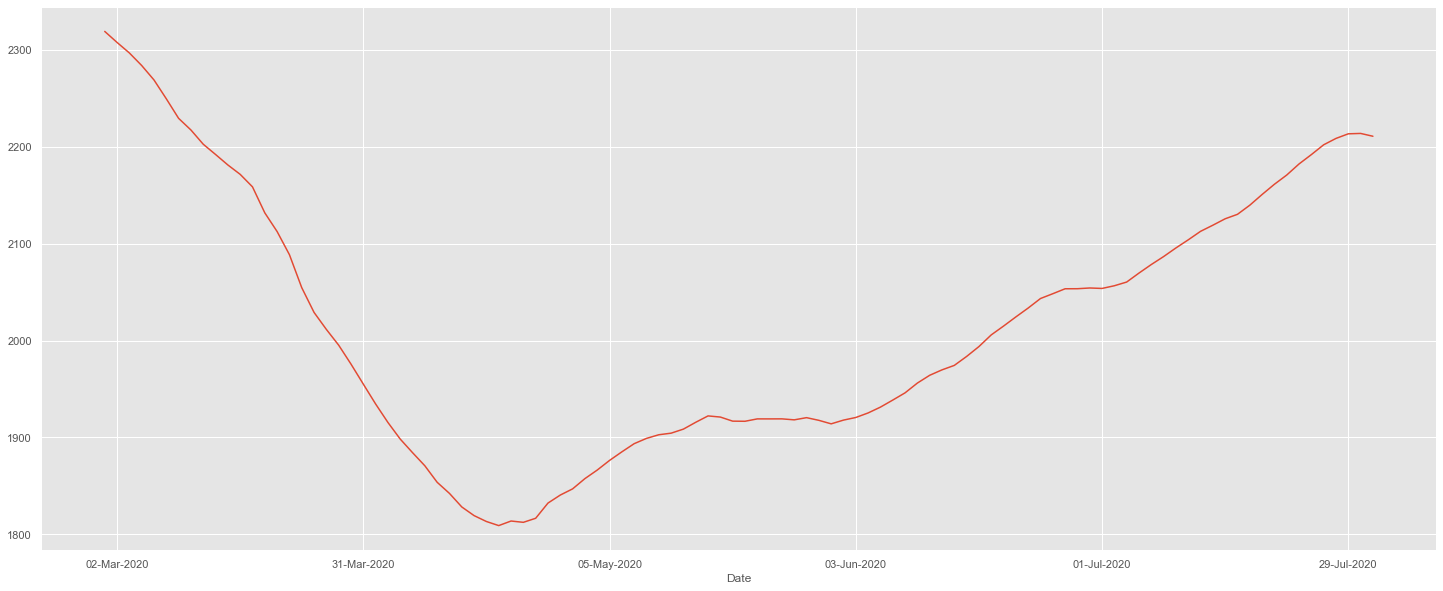

In [92]:
stock['Average Price'].rolling(window=20).mean().plot(label='Average Stock Price mean for every 20days')

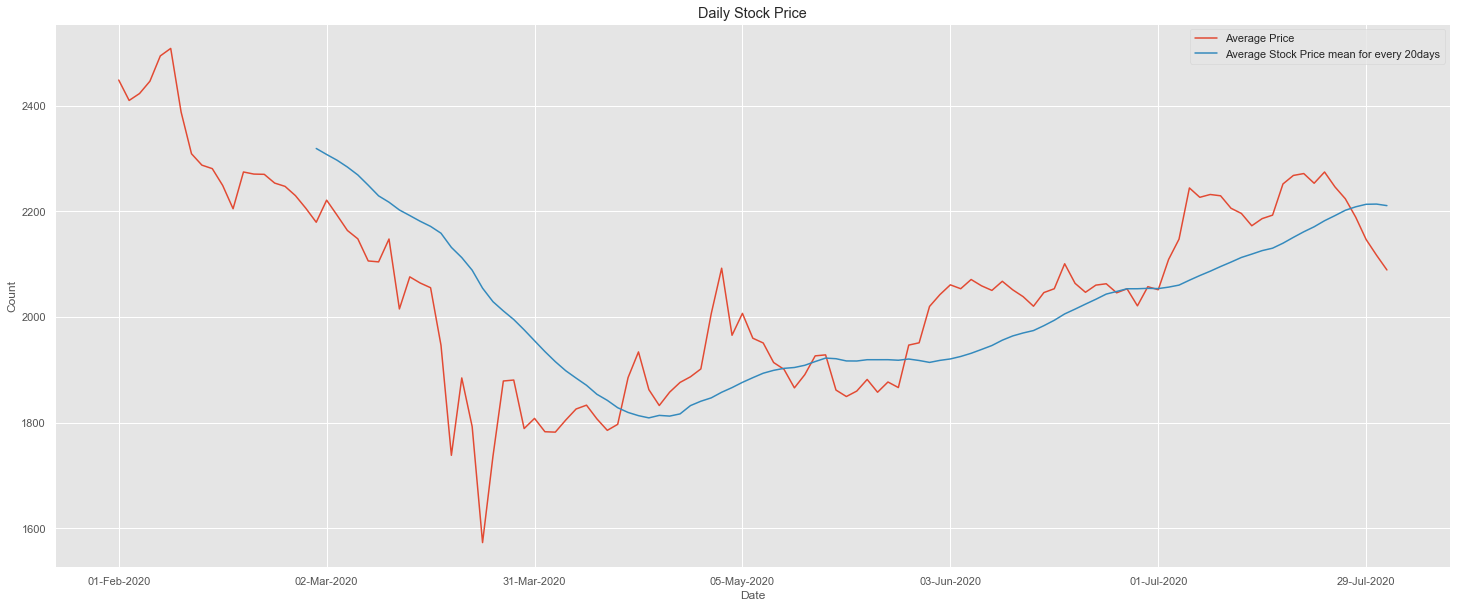

In [94]:
stock['Average Price'].plot(figsize=(25,10)).plot(label='Average Stock Price')
stock['Average Price'].rolling(window=20).mean().plot(label='Average Stock Price mean for every 20days')
plt.title('Daily Stock Price')
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.savefig('stock_price.png')

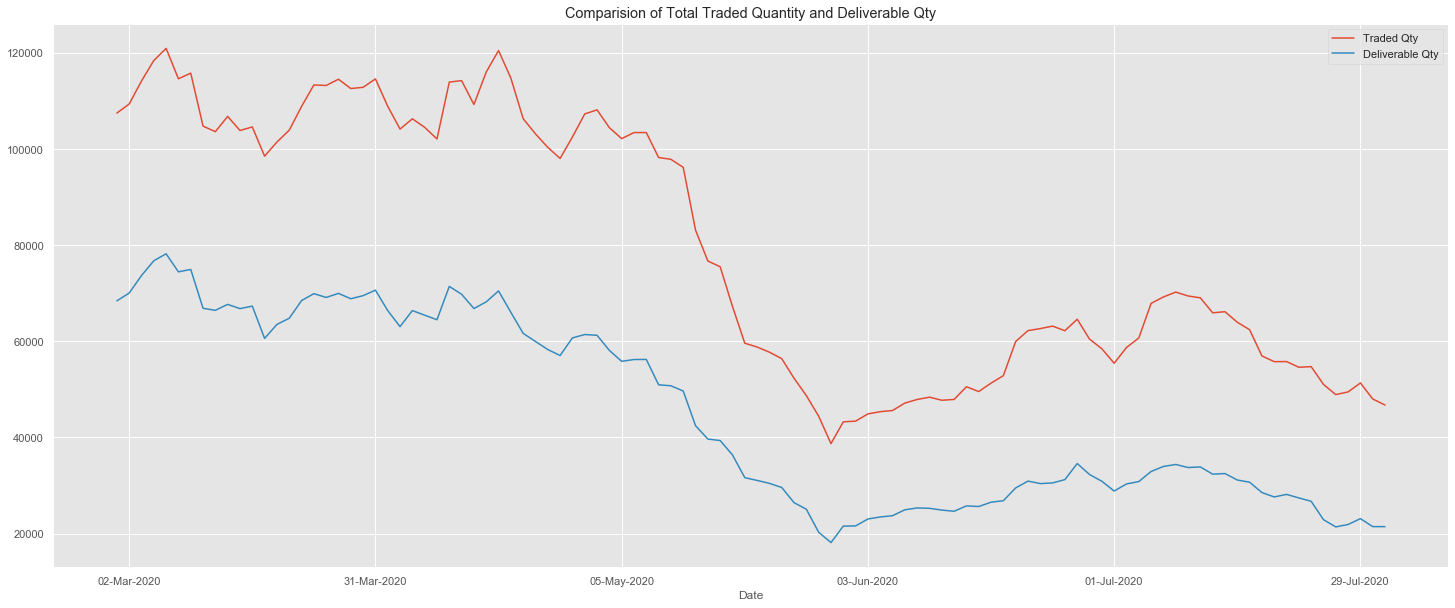

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(25, 10))

# Adjusting the style of matplotlib
style.use('ggplot')

stock['Total Traded Quantity'].rolling(window=20).mean().plot(label='Traded Qty')
stock['Deliverable Qty'].rolling(window=20).mean().plot(label='Deliverable Qty')
plt.title('Comparision of Total Traded Quantity and Deliverable Qty')
plt.legend()
plt.savefig('Trade_vs_Delivery.png')

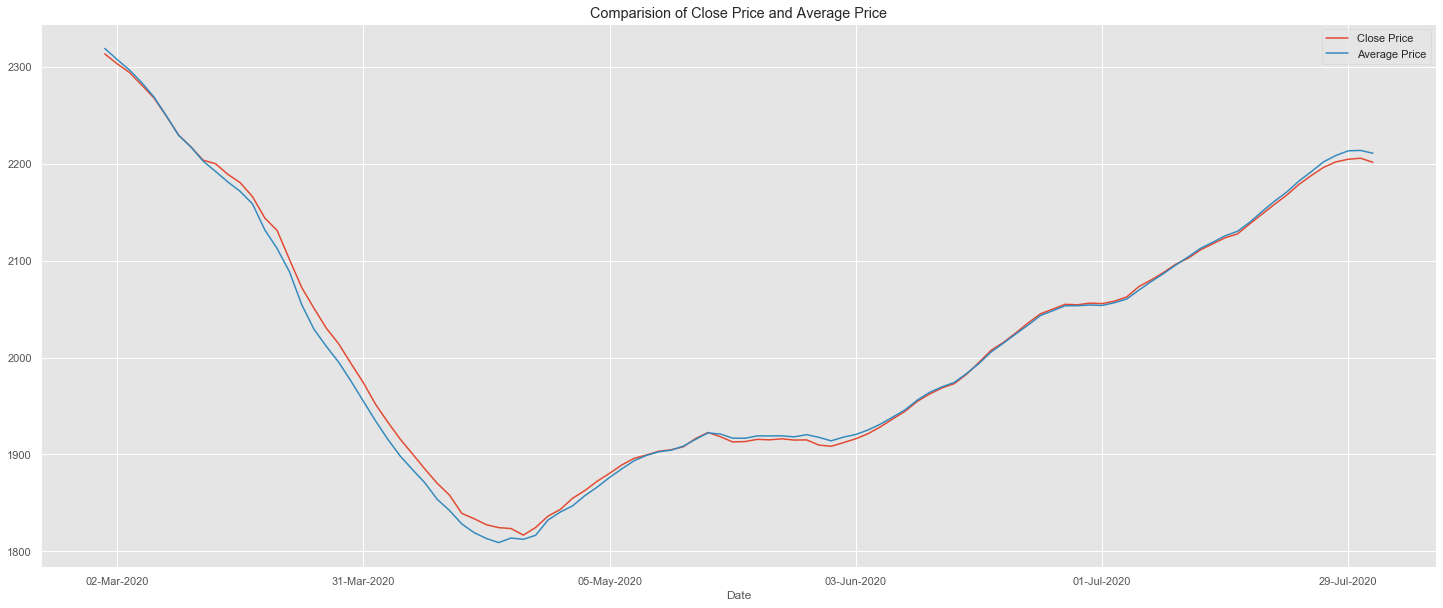

In [63]:
#Plot for Comparision of Close Price and Average Price
stock['Close Price'].rolling(window=20).mean().plot(label='Close Price')
stock['Average Price'].rolling(window=20).mean().plot(label='Average Price')
plt.title('Comparision of Close Price and Average Price')
plt.legend()

In [64]:
Avg_stock=pd.DataFrame(amazon_stock, columns=['Date','Average Price'])
Avg_stock.head()

,Date,Average Price
0,01-Feb-2020,2448.50
1,03-Feb-2020,2409.86
2,04-Feb-2020,2422.94
3,05-Feb-2020,2446.26
4,06-Feb-2020,2494.17


In [65]:
Avg_stock['Date'] = pd.to_datetime(Avg_stock.Date) 

In [66]:
Avg_stock['Month'] = Avg_stock['Date'].dt.month_name()
Avg_stock.head()

,Date,Average Price,Month
0,2020-02-01,2448.50,February
1,2020-02-03,2409.86,February
2,2020-02-04,2422.94,February
3,2020-02-05,2446.26,February
4,2020-02-06,2494.17,February


In [67]:
# Grouping Polarity values based on Month
month_stock_avg = (Avg_stock.groupby(Avg_stock['Month'])['Average Price'].mean()).to_frame().reset_index()
month_stock_avg  

,Month,Average Price
0,April,1864.080000
1,February,2318.972000
2,July,2196.681739
3,June,2052.121818
4,March,1967.718095
5,May,1908.463158


In [68]:
month_stock_avg=Sort_Dataframeby_MonthandNumeric_cols(df = month_stock_avg, monthcolumn='Month',numericcolumn='Average Price')
month_stock_avg

,Month,Average Price
0,February,2318.972000
1,March,1967.718095
2,April,1864.080000
3,May,1908.463158
4,June,2052.121818
5,July,2196.681739


In [69]:
month_stock_avg[["Average Price"]] = min_max_scaler.fit_transform(month_stock_avg[["Average Price"]])
month_stock_avg

,Month,Average Price
0,February,1.000000
1,March,0.227830
2,April,0.000000
3,May,0.097569
4,June,0.413377
5,July,0.731166


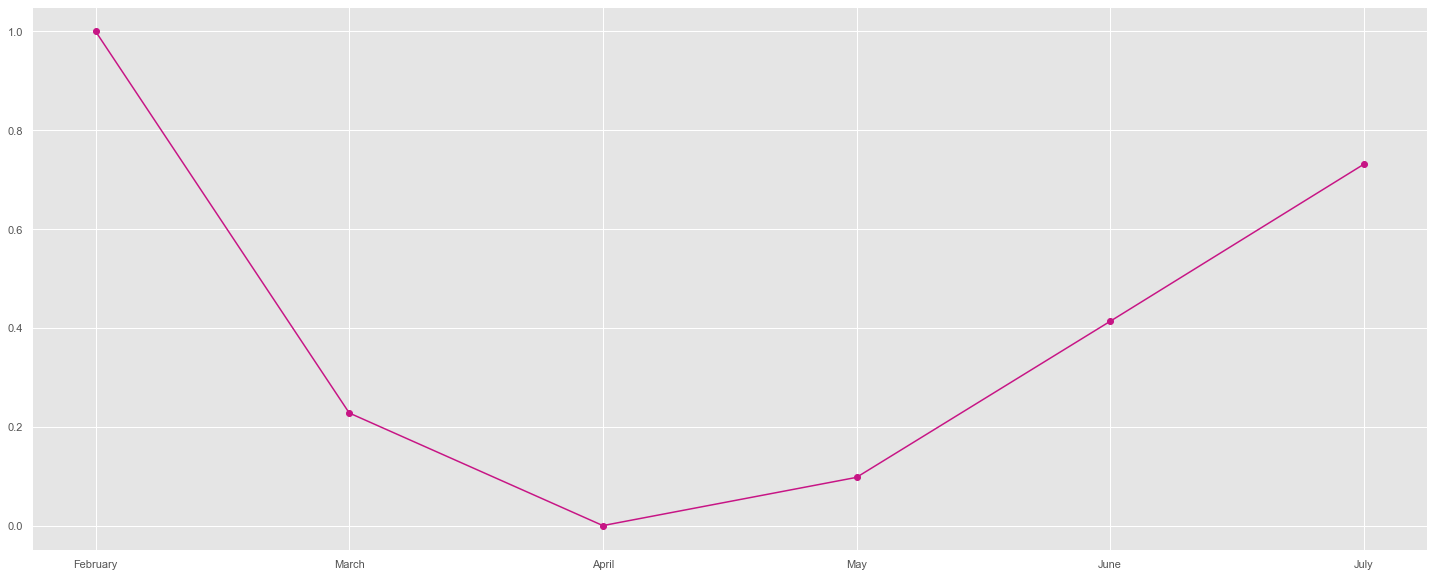

In [70]:
import seaborn as sns
plt.plot( 'Month', 'Average Price', data=month_stock_avg, marker='o', color='mediumvioletred')
# Graph of Avg_stock_Price Values based on Months

In [71]:
month_stock_avg.set_index('Month',inplace=True)

# Comparision of Monthly Average Stock Price and Avg Ratings

In [72]:
Avg_Stock_ratings_result = pd.concat([month_stock_avg, monthly_rating], axis=1).reindex(month_stock_avg.index)
Avg_Stock_ratings_result

,Average Price,Ratings
Month,,
February,1.000000,0.471154
March,0.227830,0.096990
April,0.000000,1.000000
May,0.097569,0.711538
June,0.413377,0.389140
July,0.731166,0.000000


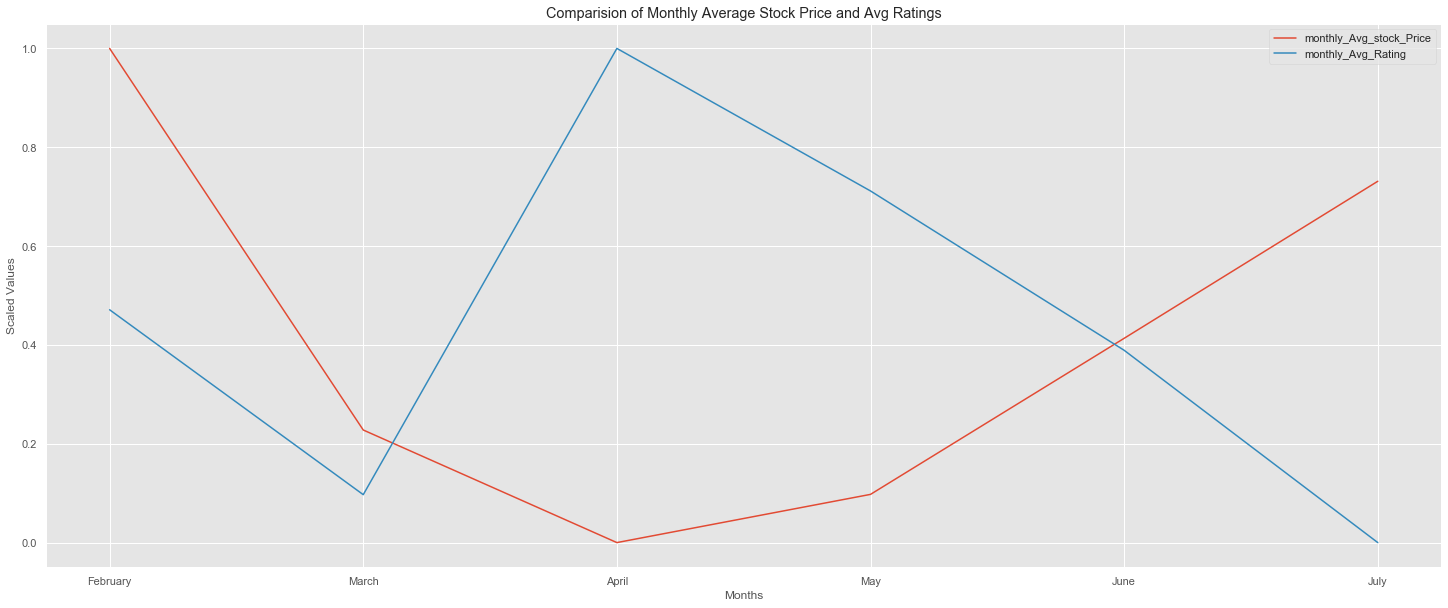

In [73]:
Avg_Stock_ratings_result['Average Price'].plot(label='monthly_Avg_stock_Price')
Avg_Stock_ratings_result['Ratings'].plot(label='monthly_Avg_Rating')
plt.xlabel("Months")
plt.ylabel("Scaled Values")
plt.title('Comparision of Monthly Average Stock Price and Avg Ratings')
plt.legend()

# Comparision of Monthly Avg Traded Qty and Avg Ratings

In [74]:
Traded_Qty=pd.DataFrame(amazon_stock, columns=['Date','Total Traded Quantity'])
Traded_Qty.head()

,Date,Total Traded Quantity
0,01-Feb-2020,29762
1,03-Feb-2020,35169
2,04-Feb-2020,29210
3,05-Feb-2020,40264
4,06-Feb-2020,188271


In [75]:
Traded_Qty['Date'] = pd.to_datetime(Traded_Qty.Date) 

In [76]:
Traded_Qty['Month'] = Traded_Qty['Date'].dt.month_name()
Traded_Qty.head()

,Date,Total Traded Quantity,Month
0,2020-02-01,29762,February
1,2020-02-03,35169,February
2,2020-02-04,29210,February
3,2020-02-05,40264,February
4,2020-02-06,188271,February


In [77]:
# Grouping Total Traded Quantity values based on Month
month_Traded_Qty = (Traded_Qty.groupby(Traded_Qty['Month'])['Total Traded Quantity'].mean()).to_frame().reset_index()
month_Traded_Qty

,Month,Total Traded Quantity
0,April,107058.777778
1,February,107487.550000
2,July,49684.652174
3,June,63211.409091
4,March,112356.047619
5,May,37156.210526


In [78]:
month_Traded_Qty=Sort_Dataframeby_MonthandNumeric_cols(df = month_Traded_Qty, monthcolumn='Month',numericcolumn='Total Traded Quantity')
month_Traded_Qty

,Month,Total Traded Quantity
0,February,107487.550000
1,March,112356.047619
2,April,107058.777778
3,May,37156.210526
4,June,63211.409091
5,July,49684.652174


In [79]:
month_Traded_Qty[["Total Traded Quantity"]] = min_max_scaler.fit_transform(month_Traded_Qty[["Total Traded Quantity"]])
month_Traded_Qty

,Month,Total Traded Quantity
0,February,0.935259
1,March,1.000000
2,April,0.929557
3,May,0.000000
4,June,0.346479
5,July,0.166602


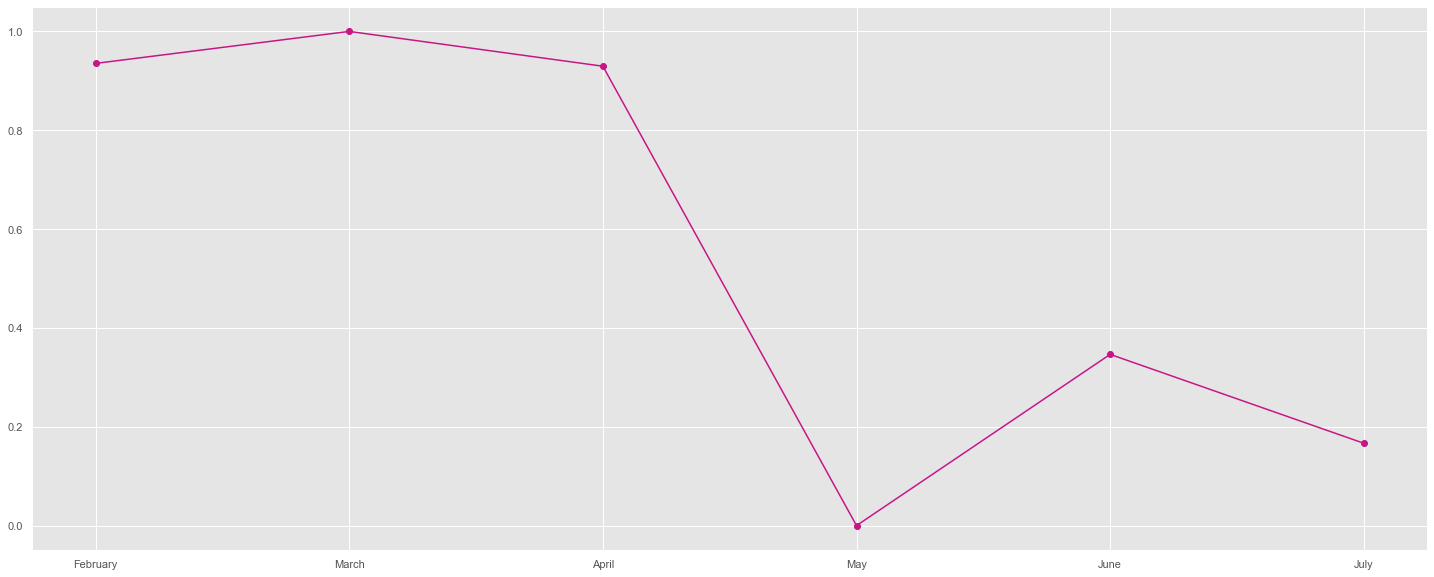

In [80]:
import seaborn as sns
plt.plot( 'Month', 'Total Traded Quantity', data=month_Traded_Qty, marker='o', color='mediumvioletred')
# Graph of Total Traded Quantity Values based on Months

In [81]:
month_Traded_Qty.set_index('Month',inplace=True)

In [82]:
Trades_ratings_result = pd.concat([month_Traded_Qty, monthly_rating], axis=1).reindex(month_Traded_Qty.index)
Trades_ratings_result

,Total Traded Quantity,Ratings
Month,,
February,0.935259,0.471154
March,1.000000,0.096990
April,0.929557,1.000000
May,0.000000,0.711538
June,0.346479,0.389140
July,0.166602,0.000000


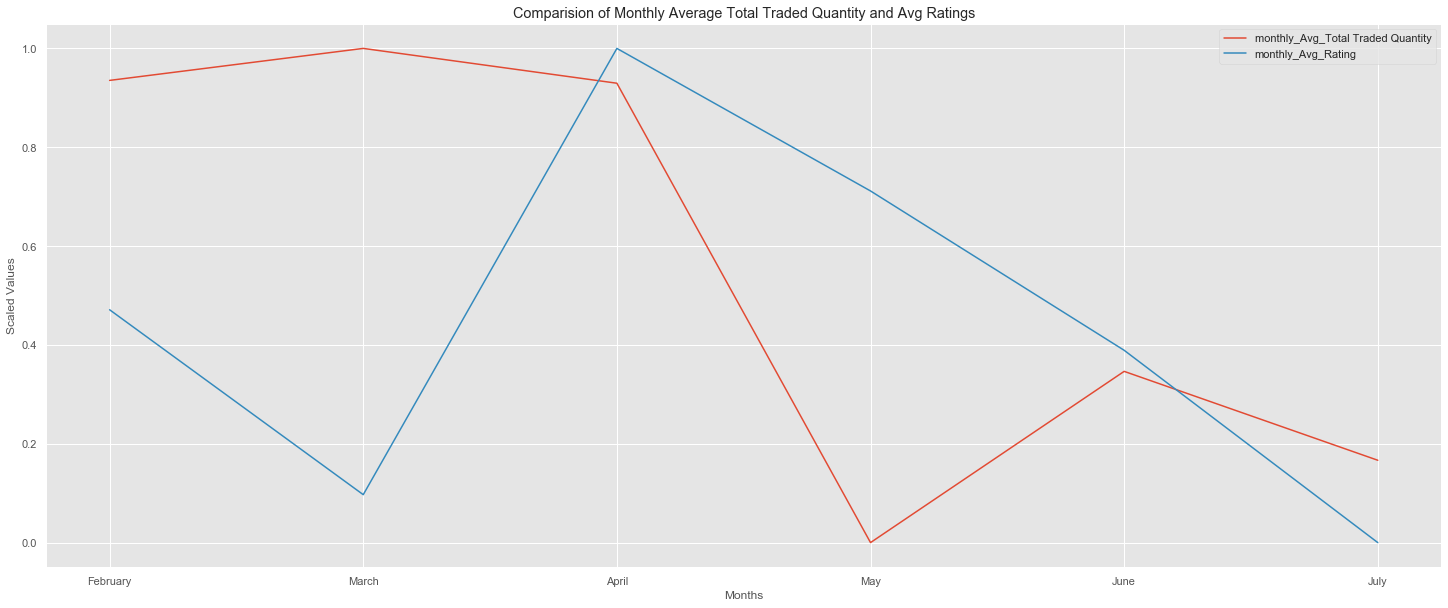

In [83]:
Trades_ratings_result['Total Traded Quantity'].plot(label='monthly_Avg_Total Traded Quantity')
Trades_ratings_result['Ratings'].plot(label='monthly_Avg_Rating')
plt.xlabel("Months")
plt.ylabel("Scaled Values")
plt.title('Comparision of Monthly Average Total Traded Quantity and Avg Ratings')
plt.legend()

# Comparision of Monthly Average Stock Price and Avg Polarity

In [84]:
Avg_Trade_Polarity_result = pd.concat([month_Traded_Qty, monthly_polarity], axis=1).reindex(month_Traded_Qty.index)
Avg_Trade_Polarity_result

,Total Traded Quantity,polarity
Month,,
February,0.935259,0.214765
March,1.000000,0.052816
April,0.929557,1.000000
May,0.000000,0.000000
June,0.346479,0.223056
July,0.166602,0.211335


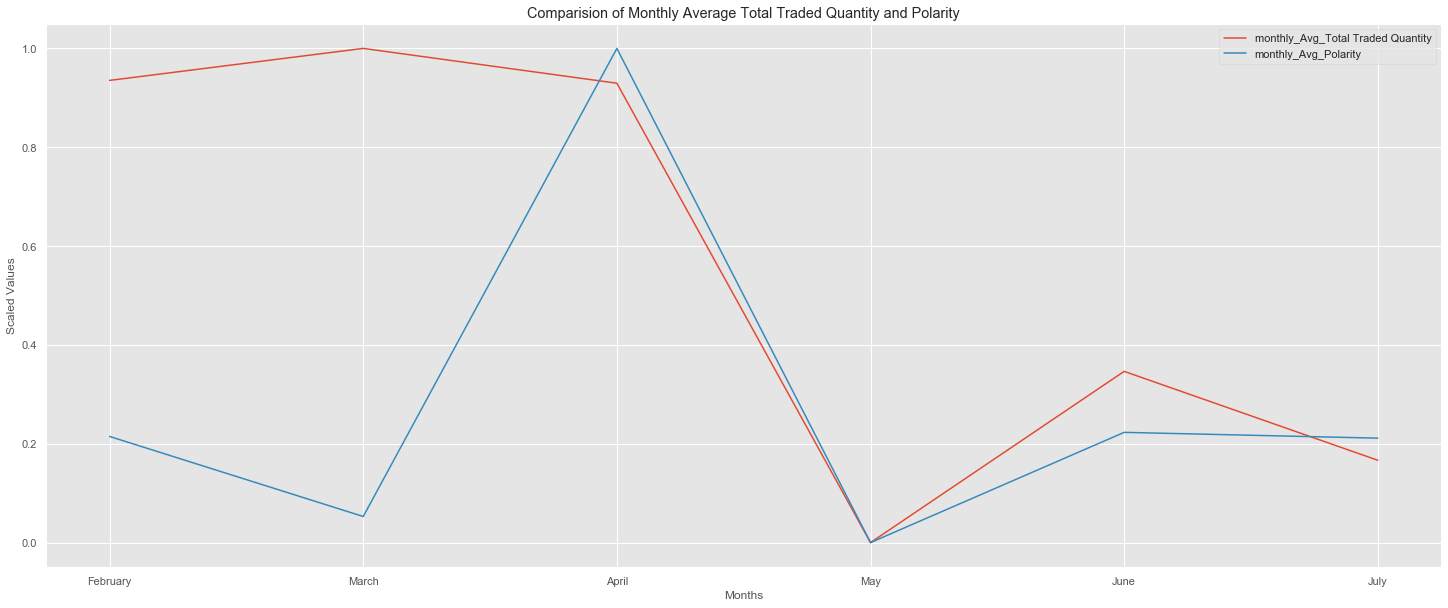

In [93]:
Avg_Trade_Polarity_result['Total Traded Quantity'].plot(label='monthly_Avg_Total Traded Quantity')
Avg_Trade_Polarity_result['polarity'].plot(label='monthly_Avg_Polarity')
plt.xlabel("Months")
plt.ylabel("Scaled Values")
plt.title('Comparision of Monthly Average Total Traded Quantity and Polarity')
plt.legend()
plt.savefig('Trade_vs_polarity.png')

# Comparision of Monthly Average Stock Price and Avg Polarity

In [86]:
final_result = pd.concat([month_stock_avg, monthly_polarity], axis=1).reindex(month_stock_avg.index)
final_result

,Average Price,polarity
Month,,
February,1.000000,0.214765
March,0.227830,0.052816
April,0.000000,1.000000
May,0.097569,0.000000
June,0.413377,0.223056
July,0.731166,0.211335


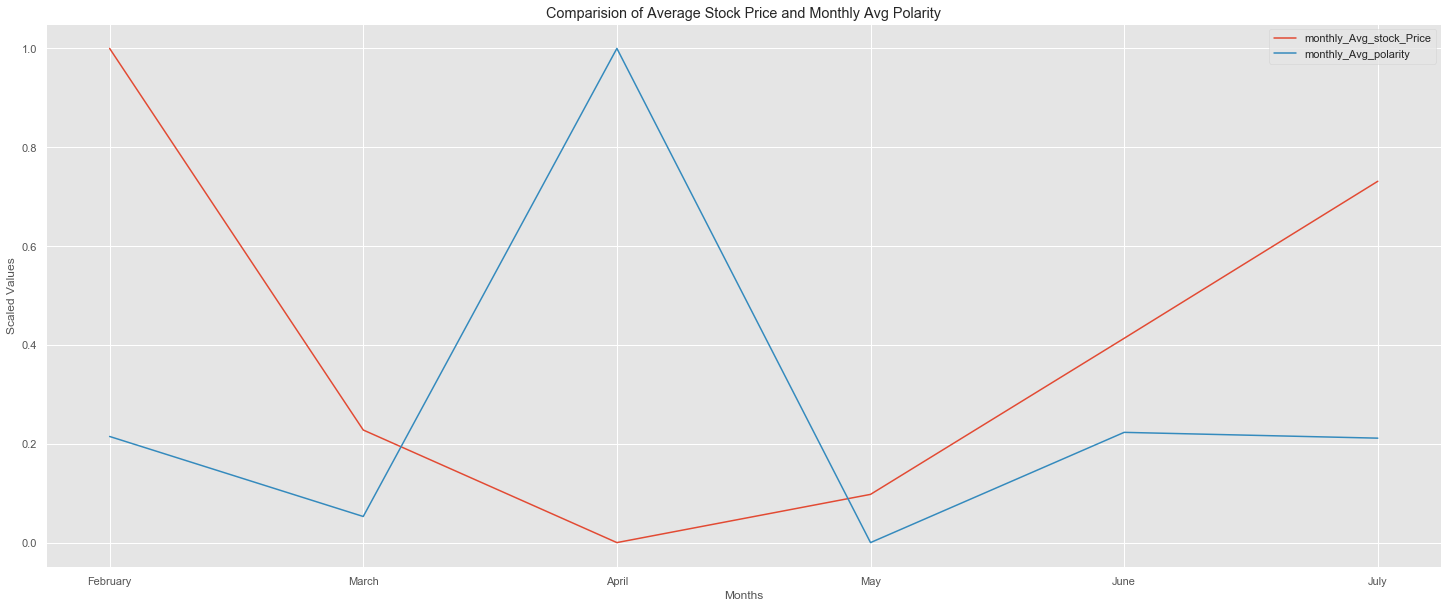

In [87]:
final_result['Average Price'].plot(label='monthly_Avg_stock_Price')
final_result['polarity'].plot(label='monthly_Avg_polarity')
plt.xlabel("Months")
plt.ylabel("Scaled Values")
plt.title('Comparision of Average Stock Price and Monthly Avg Polarity')
plt.legend()
plt.savefig('stock_vs_polarity.png')

In [88]:
final_df = pd.concat([month_stock_avg,monthly_rating, month_Traded_Qty,monthly_polarity], axis=1).reindex(month_stock_avg.index)
final_df

,Average Price,Ratings,Total Traded Quantity,polarity
Month,,,,
February,1.000000,0.471154,0.935259,0.214765
March,0.227830,0.096990,1.000000,0.052816
April,0.000000,1.000000,0.929557,1.000000
May,0.097569,0.711538,0.000000,0.000000
June,0.413377,0.389140,0.346479,0.223056
July,0.731166,0.000000,0.166602,0.211335


In [89]:
final_df.to_csv('final_df.csv')